<h1>Atividade 02 - melhorar o desempenho de RP em conjunto de dados existentes</h1>
<p>A atividade 02 visa trabalhar com um conjunto de dados pré-construído, onde as opções que o desenvolvedor tem, são de aplicar as técnicas de pré-processamento abaixo relacionadas:</p>
<ul><li>Seleção</li>
<li>Limpeza</li>
<li>Codificação</li>
<li>Enriquecimento</li>
<li>Normalização</li>
<li>Construção de Atributos</li>
<li>Correção de Prevalência</li>
<li>Partição do Conjunto de Dados</li>
</ul>
<p>Busque uma base de dados na UCI Machine Learning que seja indicada para problemas de classificação. (<a target="_blank" href="https://archive.ics.uci.edu/datasets">https://archive.ics.uci.edu/datasets</a>)</p>
<p>Para esse exemplo, vou usar a base de câncer de mama (https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)</p>


Opção 01 - carregue o arquivo de dados da pasta local para o colab.


In [ ]:
import numpy as np
import pandas as pd

#
# base de dados disponível na UCI Machine Learning - https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic
cancer_colunas = ['id','Diagnosis',
                  'radius_mean','texture_mean','perimeter_mean', 'area_mean',
                  'smoothness_mean','compactness_mean','concavity_mean',
                  'concave_mean','symmetry_mean','fractal_mean',

                  'radius_se','texture_se','perimeter_se', 'area_se','smoothness_se',
                  'compactness_se','concavity_se','concave_se','symmetry_se','fractal_se'

                  'radius_worst','texture_worst','perimeter_worst', 'area_worst',
                  'smoothness_worst','compactness_worst','concavity_worst',
                  'concave_worst','symmetry_worst','fractal_worst']
cancer = pd.read_csv('/content/wdbc.data',header=None,
                     names=cancer_colunas, lineterminator='\n', na_values='?')

# visualizar parte dos dados
print( cancer.head() )

#
# caso queira usar do google-drivre
#from google.colab import drive
#drive.mount('/content/drive')
#drive.mount(“/content/drive”, force_remount=True)

         id  Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
842302    M      17.99        10.38        122.80          1001.0    0.11840   
842517    M      20.57        17.77        132.90          1326.0    0.08474   
84300903  M      19.69        21.25        130.00          1203.0    0.10960   
84348301  M      11.42        20.38         77.58           386.1    0.14250   
84358402  M      20.29        14.34        135.10          1297.0    0.10030   

          smoothness_mean  compactness_mean  concavity_mean  concave_mean  \
842302            0.27760            0.3001         0.14710        0.2419   
842517            0.07864            0.0869         0.07017        0.1812   
84300903          0.15990            0.1974         0.12790        0.2069   
84348301          0.28390            0.2414         0.10520        0.2597   
84358402          0.13280            0.1980         0.10430        0.1809   

          ...  fractal_seradius_worst  texture_worst  pe

Para baixar direto da web e tratar arquivos compactados, sem o uso de arquivos locais.


In [53]:
# import requests, zipfile, io
from io import BytesIO
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
  

# fetch dataset 
dataset = fetch_ucirepo(id=697) 


# data (as pandas dataframes) 
X = dataset.data.features 
y = dataset.data.targets 
  
# metadata 
print("Dataset Metadata:")
print(dataset.metadata) 
  
# variable information 
print("\nVariable Information:")
print(dataset.variables) 

# Display information about the dataset
print("\nFeatures DataFrame Info:")
print(X.info())

print("\nFeatures DataFrame Summary:")
print(X.describe())

print("\nTarget Distribution:")
print(y['Target'].value_counts())



# r = requests.get('https://archive.ics.uci.edu/static/public/17/breast+cancer+wisconsin+diagnostic.zip')
# z = zipfile.ZipFile(io.BytesIO(r.content))
# z.namelist()
# dadosfp = z.open('wdbc.data')
# dados = dadosfp.read()
# cancer2 = pd.read_csv(io.BytesIO(dados),header=None,
#                      names=cancer_colunas, lineterminator='\n', na_values='?')
# print( cancer.head() )

# cancer.describe()

Dataset Metadata:
{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Features DataFrame Info:")
print(X.info())

print("\nFeatures DataFrame Summary:")
print(X.describe())

print("\nPrimeiras linhas das features:")
print(X.head())

print("\nVerificando valores nulos nas features:")
print(X.isnull().sum())

Features DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualifi


Target Distribution:
Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


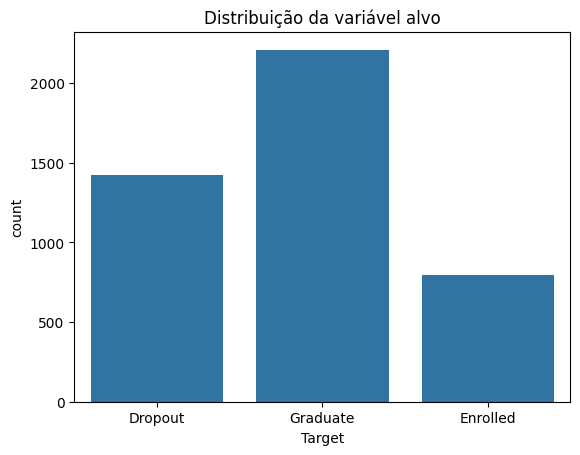

In [55]:
# 2. Distribuição do target
print("\nTarget Distribution:")
print(y['Target'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Target', data=y)
plt.title('Distribuição da variável alvo')
plt.show()

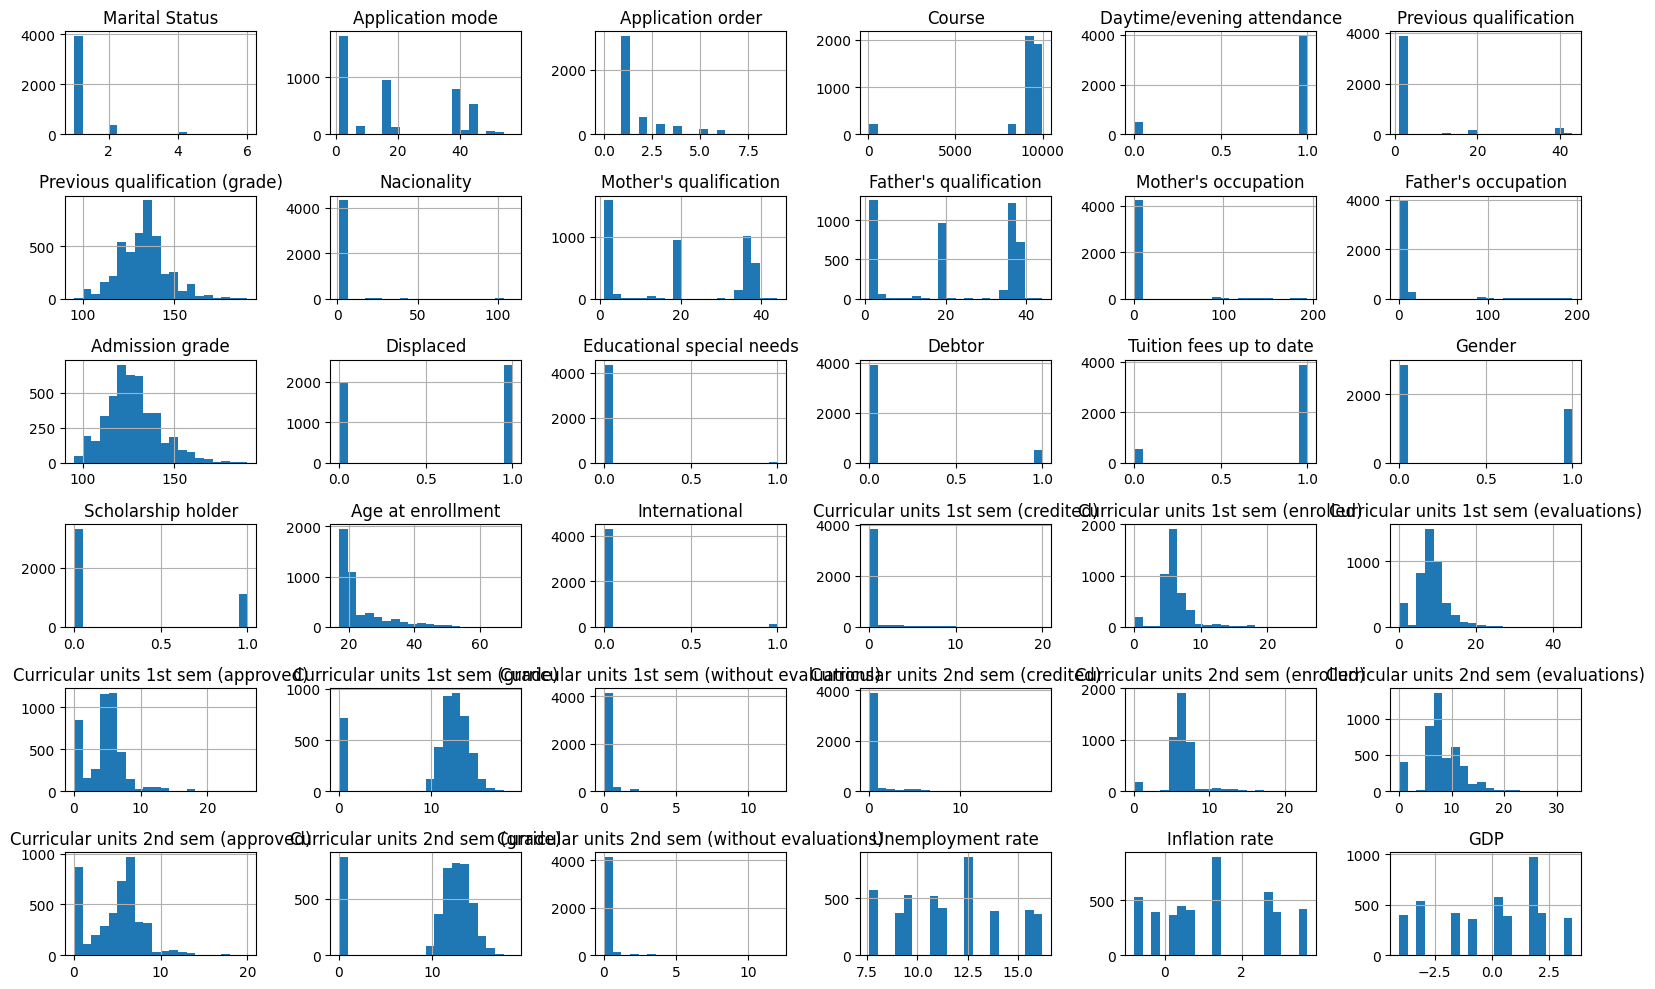

In [56]:
X.hist(bins=20, figsize=(16,10))
plt.tight_layout()
plt.show()



In [57]:
# Mostra todas as colunas das primeiras 5 linhas
print(X.head().to_string())

# Mostra contagem de valores nulos em todas as colunas
print(X.isnull().sum().to_string())

   Marital Status  Application mode  Application order  Course  Daytime/evening attendance  Previous qualification  Previous qualification (grade)  Nacionality  Mother's qualification  Father's qualification  Mother's occupation  Father's occupation  Admission grade  Displaced  Educational special needs  Debtor  Tuition fees up to date  Gender  Scholarship holder  Age at enrollment  International  Curricular units 1st sem (credited)  Curricular units 1st sem (enrolled)  Curricular units 1st sem (evaluations)  Curricular units 1st sem (approved)  Curricular units 1st sem (grade)  Curricular units 1st sem (without evaluations)  Curricular units 2nd sem (credited)  Curricular units 2nd sem (enrolled)  Curricular units 2nd sem (evaluations)  Curricular units 2nd sem (approved)  Curricular units 2nd sem (grade)  Curricular units 2nd sem (without evaluations)  Unemployment rate  Inflation rate   GDP
0               1                17                  5     171                           1   

In [58]:
X.columns

Index(['Marital Status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s

In [59]:
for col in X.columns:
    print(f"{col}: {X[col].nunique()} únicos")

Marital Status: 6 únicos
Application mode: 18 únicos
Application order: 8 únicos
Course: 17 únicos
Daytime/evening attendance: 2 únicos
Previous qualification: 17 únicos
Previous qualification (grade): 101 únicos
Nacionality: 21 únicos
Mother's qualification: 29 únicos
Father's qualification: 34 únicos
Mother's occupation: 32 únicos
Father's occupation: 46 únicos
Admission grade: 620 únicos
Displaced: 2 únicos
Educational special needs: 2 únicos
Debtor: 2 únicos
Tuition fees up to date: 2 únicos
Gender: 2 únicos
Scholarship holder: 2 únicos
Age at enrollment: 46 únicos
International: 2 únicos
Curricular units 1st sem (credited): 21 únicos
Curricular units 1st sem (enrolled): 23 únicos
Curricular units 1st sem (evaluations): 35 únicos
Curricular units 1st sem (approved): 23 únicos
Curricular units 1st sem (grade): 797 únicos
Curricular units 1st sem (without evaluations): 11 únicos
Curricular units 2nd sem (credited): 19 únicos
Curricular units 2nd sem (enrolled): 22 únicos
Curricular u

In [60]:
# 3. Juntando tudo (opcional, só para facilitar)
df = pd.concat([X, y], axis=1)
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [61]:
# Salva os tipos de dados em um arquivo txt
X.dtypes.to_csv("dtypes_X.txt")

In [62]:
# Mostra o tipo de cada coluna, todas em uma linha
print(X.dtypes)

Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender        

In [63]:
# 3. Juntando tudo (opcional, só para facilitar)
df = pd.concat([X, y], axis=1)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

<h2>Hora de realizar os tratamentos<h2>
<p>no exemplo, iremos normalizar as colunas, remover a coluna de identificação e separar a classe dos atributos.</p>

Acurácia: 0.4992469879518072
              precision    recall  f1-score   support

     Dropout       0.00      0.00      0.00       427
    Enrolled       0.00      0.00      0.00       238
    Graduate       0.50      1.00      0.67       663

    accuracy                           0.50      1328
   macro avg       0.17      0.33      0.22      1328
weighted avg       0.25      0.50      0.33      1328



c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\UFPR\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

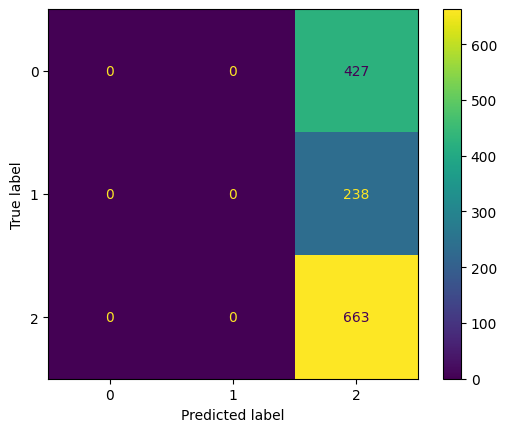

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay

# Use X e y['Target'] direto
X_train, X_test, y_train, y_test = train_test_split(
    X, y['Target'], test_size=0.3, random_state=42, stratify=y['Target']
)

clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Acurácia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [72]:
# X já está definido como suas features:
print(X.head())

# Se quiser uma lista dos nomes das colunas:
cols = list(X.columns)
print(cols)

# Y vai ser a variável alvo, no seu caso: y['Target']
Y = y['Target']
Y_orig = y['Target'].copy()  # copia original, se precisar depois

# Mostra os valores únicos do target (classes):
print(Y.unique())

# X = cancer.iloc[:,2:]
# cols = cancer_colunas[2:]
# print(X.head())
# Y = cancer['id']
# Y_orig = cancer['id']
# print(Y.unique())

   Marital Status  Application mode  Application order    Course  \
0             0.0          0.285714           0.555556  0.013858   
1             0.0          0.250000           0.111111  0.925989   
2             0.0          0.000000           0.555556  0.907512   
3             0.0          0.285714           0.222222  0.978108   
4             0.2          0.678571           0.111111  0.801466   

   Daytime/evening attendance  Previous qualification  \
0                         1.0                     0.0   
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         0.0                     0.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                        0.284211          0.0                0.418605   
1                        0.684211          0.0                0.000000   
2                        0

Na próxima seção que deverão ser realizada as tentativas de tratamento de dados, visando a melhoria no desempenho do classificador (SVM).

In [66]:
print("Shape X:", X.shape)
print("Shape Y:", Y.shape)

Shape X: (4424, 36)
Shape Y: (4424,)


In [73]:

from sklearn.preprocessing import minmax_scale
import pandas as pd

X_orig = X.copy()
print(X_orig.head())

print(Y_orig.unique())

# Normalização min-max (mantendo nomes das colunas)
X = pd.DataFrame(minmax_scale(X_orig), columns=X_orig.columns)

print(X_orig.head())
print(X.head())

# from sklearn.preprocessing import scale
# from sklearn.preprocessing import minmax_scale
# import pandas as pd

# X_orig =  X.copy()
# print(X_orig.head())

# print(Y_orig.unique() )

# # normalização min-max
# X = pd.DataFrame( minmax_scale(X) )

# print(X_orig.head())
# print(X.head())

# A normalização pode ser manual, usando o pandas... ex:
#X['radius_mean'] = (X_orig['radius_mean']-X_orig['radius_mean'].mean()) / X_orig['radius_mean'].std()
# normalização min-max
#X['texture_mean'] = (X_orig['texture_mean']-X_orig['texture_mean'].min()) / (X_orig['texture_mean'].max()-X_orig['texture_mean'].min())

   Marital Status  Application mode  Application order    Course  \
0             0.0          0.285714           0.555556  0.013858   
1             0.0          0.250000           0.111111  0.925989   
2             0.0          0.000000           0.555556  0.907512   
3             0.0          0.285714           0.222222  0.978108   
4             0.2          0.678571           0.111111  0.801466   

   Daytime/evening attendance  Previous qualification  \
0                         1.0                     0.0   
1                         1.0                     0.0   
2                         1.0                     0.0   
3                         1.0                     0.0   
4                         0.0                     0.0   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                        0.284211          0.0                0.418605   
1                        0.684211          0.0                0.000000   
2                        0

A próxima seção trata da construção do modelo, dos testes e das métricas da matriz de confusão.

In [74]:
print(X.describe())


       Marital Status  Application mode  Application order       Course  \
count     4424.000000       4424.000000        4424.000000  4424.000000   
mean         0.035714          0.315519           0.191983     0.886086   
std          0.121149          0.312226           0.145977     0.207227   
min          0.000000          0.000000           0.000000     0.000000   
25%          0.000000          0.000000           0.111111     0.909018   
50%          0.000000          0.285714           0.111111     0.924382   
75%          0.000000          0.678571           0.222222     0.956317   
max          1.000000          1.000000           1.000000     1.000000   

       Daytime/evening attendance  Previous qualification  \
count                 4424.000000             4424.000000   
mean                     0.890823                0.085185   
std                      0.311897                0.243252   
min                      0.000000                0.000000   
25%                

In [86]:
from sklearn.model_selection import train_test_split
import numpy as np

# com os dados originais
X_oring_train, X_orig_test, y_orig_train, y_orig_test = train_test_split(X_orig,
                      Y_orig, test_size=0.25, stratify=Y_orig,random_state=10)

# com os dados tratados
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25,
                                                    stratify=Y,random_state=10)

Treina o modelo com base nos dados originais (SVM).

In [76]:

from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo_orig = treinador.fit(X_oring_train, y_orig_train)

# predição com os mesmos dados usados para treinar
y_orig_pred = modelo_orig.predict(X_oring_train)
cm_orig_train = confusion_matrix(y_orig_train, y_orig_pred)
print('Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO')
print(cm_orig_train)
print(classification_report(y_orig_train, y_orig_pred))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_orig_pred = modelo_orig.predict(X_orig_test)
cm_orig_test = confusion_matrix(y_orig_test, y2_orig_pred)
print(cm_orig_test)
print(classification_report(y_orig_test, y2_orig_pred))


Matriz de confusão - com os dados ORIGINAIS usados no TREINAMENTO
[[ 783  102  181]
 [  79  217  299]
 [  25   24 1608]]
              precision    recall  f1-score   support

     Dropout       0.88      0.73      0.80      1066
    Enrolled       0.63      0.36      0.46       595
    Graduate       0.77      0.97      0.86      1657

    accuracy                           0.79      3318
   macro avg       0.76      0.69      0.71      3318
weighted avg       0.78      0.79      0.77      3318

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[255  37  63]
 [ 37  47 115]
 [ 14  12 526]]
              precision    recall  f1-score   support

     Dropout       0.83      0.72      0.77       355
    Enrolled       0.49      0.24      0.32       199
    Graduate       0.75      0.95      0.84       552

    accuracy                           0.75      1106
   macro avg       0.69      0.64      0.64      1106
weighted avg       0.73      0.75      0.72      1106



Como os dados ficam após os processos de tratamento dos dados?

In [88]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo = treinador.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_pred = modelo.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))


Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[ 760   73  233]
 [  73  144  378]
 [  25   15 1617]]
              precision    recall  f1-score   support

     Dropout       0.89      0.71      0.79      1066
    Enrolled       0.62      0.24      0.35       595
    Graduate       0.73      0.98      0.83      1657

    accuracy                           0.76      3318
   macro avg       0.74      0.64      0.66      3318
weighted avg       0.76      0.76      0.73      3318

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[244  26  85]
 [ 34  30 135]
 [ 15   3 534]]
              precision    recall  f1-score   support

     Dropout       0.83      0.69      0.75       355
    Enrolled       0.51      0.15      0.23       199
    Graduate       0.71      0.97      0.82       552

    accuracy                           0.73      1106
   macro avg       0.68      0.60      0.60      1106
weighted avg       0.71      0.73      0.69      1106



<h2> Verificar Correlação</h2>

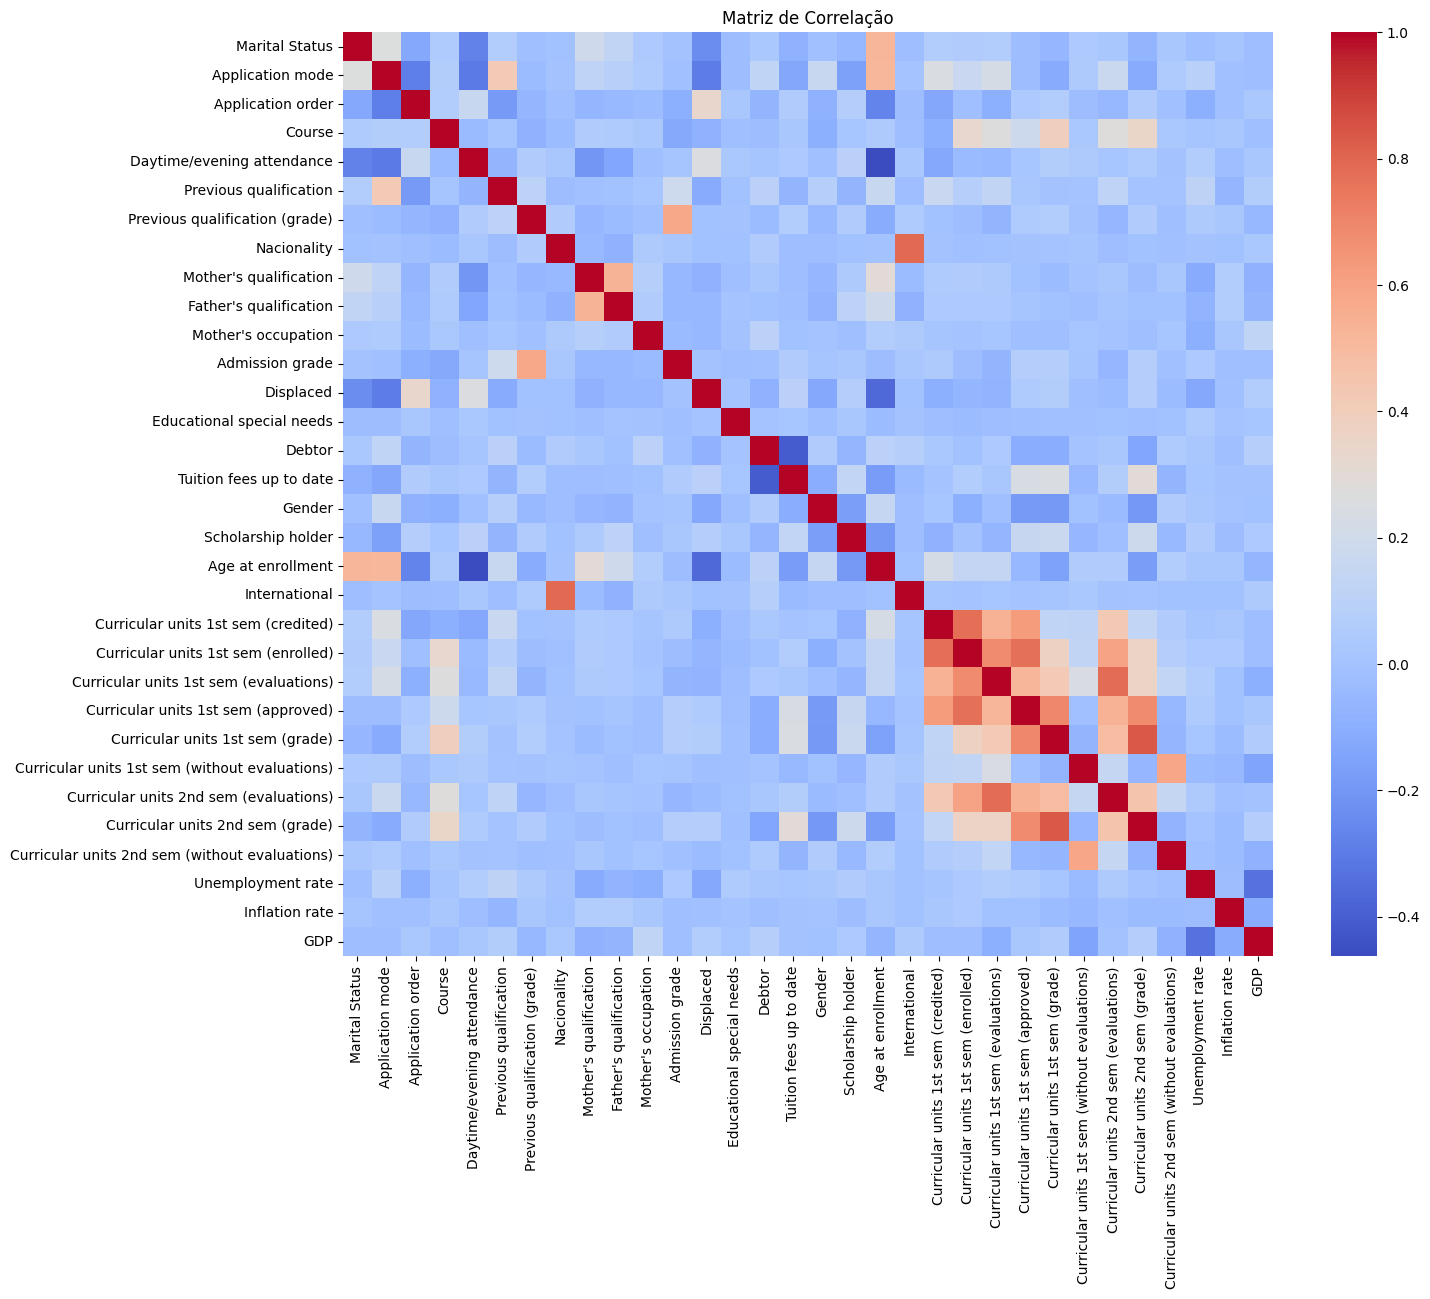

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = X.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [85]:
# Calcula a matriz de correlação
corr = X.corr()

# Seleciona apenas a parte superior da matriz (sem duplicar pares)
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

# Lista colunas que têm correlação absoluta maior que 0.9 com qualquer outra
to_drop = [column for column in upper.columns if any(upper[column].abs() > 0.85)]
print("Atributos altamente correlacionados:", to_drop)

# Remove do DataFrame X essas colunas
X_corr = X.copy()
X = X.drop(columns=to_drop)

Atributos altamente correlacionados: []


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)

In [95]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

treinador = svm.SVC()  #algoritmo escolhido

modelo = treinador.fit(X_train, y_train)

# predição com os mesmos dados usados para treinar
y_pred = modelo.predict(X_train)
cm_train = confusion_matrix(y_train, y_pred)
print('Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO')
print(cm_train)
print(classification_report(y_train, y_pred))

# predição com os mesmos dados usados para testar
print('Matriz de confusão - com os dados ORIGINAIS usados para TESTES')
y2_pred = modelo.predict(X_test)
cm_test = confusion_matrix(y_test, y2_pred)
print(cm_test)
print(classification_report(y_test, y2_pred))

Matriz de confusão - com os dados TRATADOS usados no TREINAMENTO
[[ 783  110  173]
 [  80  207  308]
 [  29   23 1605]]
              precision    recall  f1-score   support

     Dropout       0.88      0.73      0.80      1066
    Enrolled       0.61      0.35      0.44       595
    Graduate       0.77      0.97      0.86      1657

    accuracy                           0.78      3318
   macro avg       0.75      0.68      0.70      3318
weighted avg       0.78      0.78      0.76      3318

Matriz de confusão - com os dados ORIGINAIS usados para TESTES
[[240  39  76]
 [ 34  61 104]
 [ 13  19 520]]
              precision    recall  f1-score   support

     Dropout       0.84      0.68      0.75       355
    Enrolled       0.51      0.31      0.38       199
    Graduate       0.74      0.94      0.83       552

    accuracy                           0.74      1106
   macro avg       0.70      0.64      0.65      1106
weighted avg       0.73      0.74      0.72      1106



In [93]:
# Volte ao X com todas as colunas
X = X_orig.copy()

In [94]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=42, stratify=Y
)

In [ ]:
import matplotlib.pyplot as plt

col_continuas = X.select_dtypes(include=['float64']).columns
print("Variáveis contínuas:", list(col_continuas))

# Define número de colunas por linha
n_cols = 4
n_rows = (len(X.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*4, n_rows*4))

for idx, col in enumerate(col_continuas.columns):
    plt.subplot(n_rows, n_cols, idx+1)
    plt.boxplot(X[col], vert=True)
    plt.title(col)
    plt.tight_layout()

plt.show()

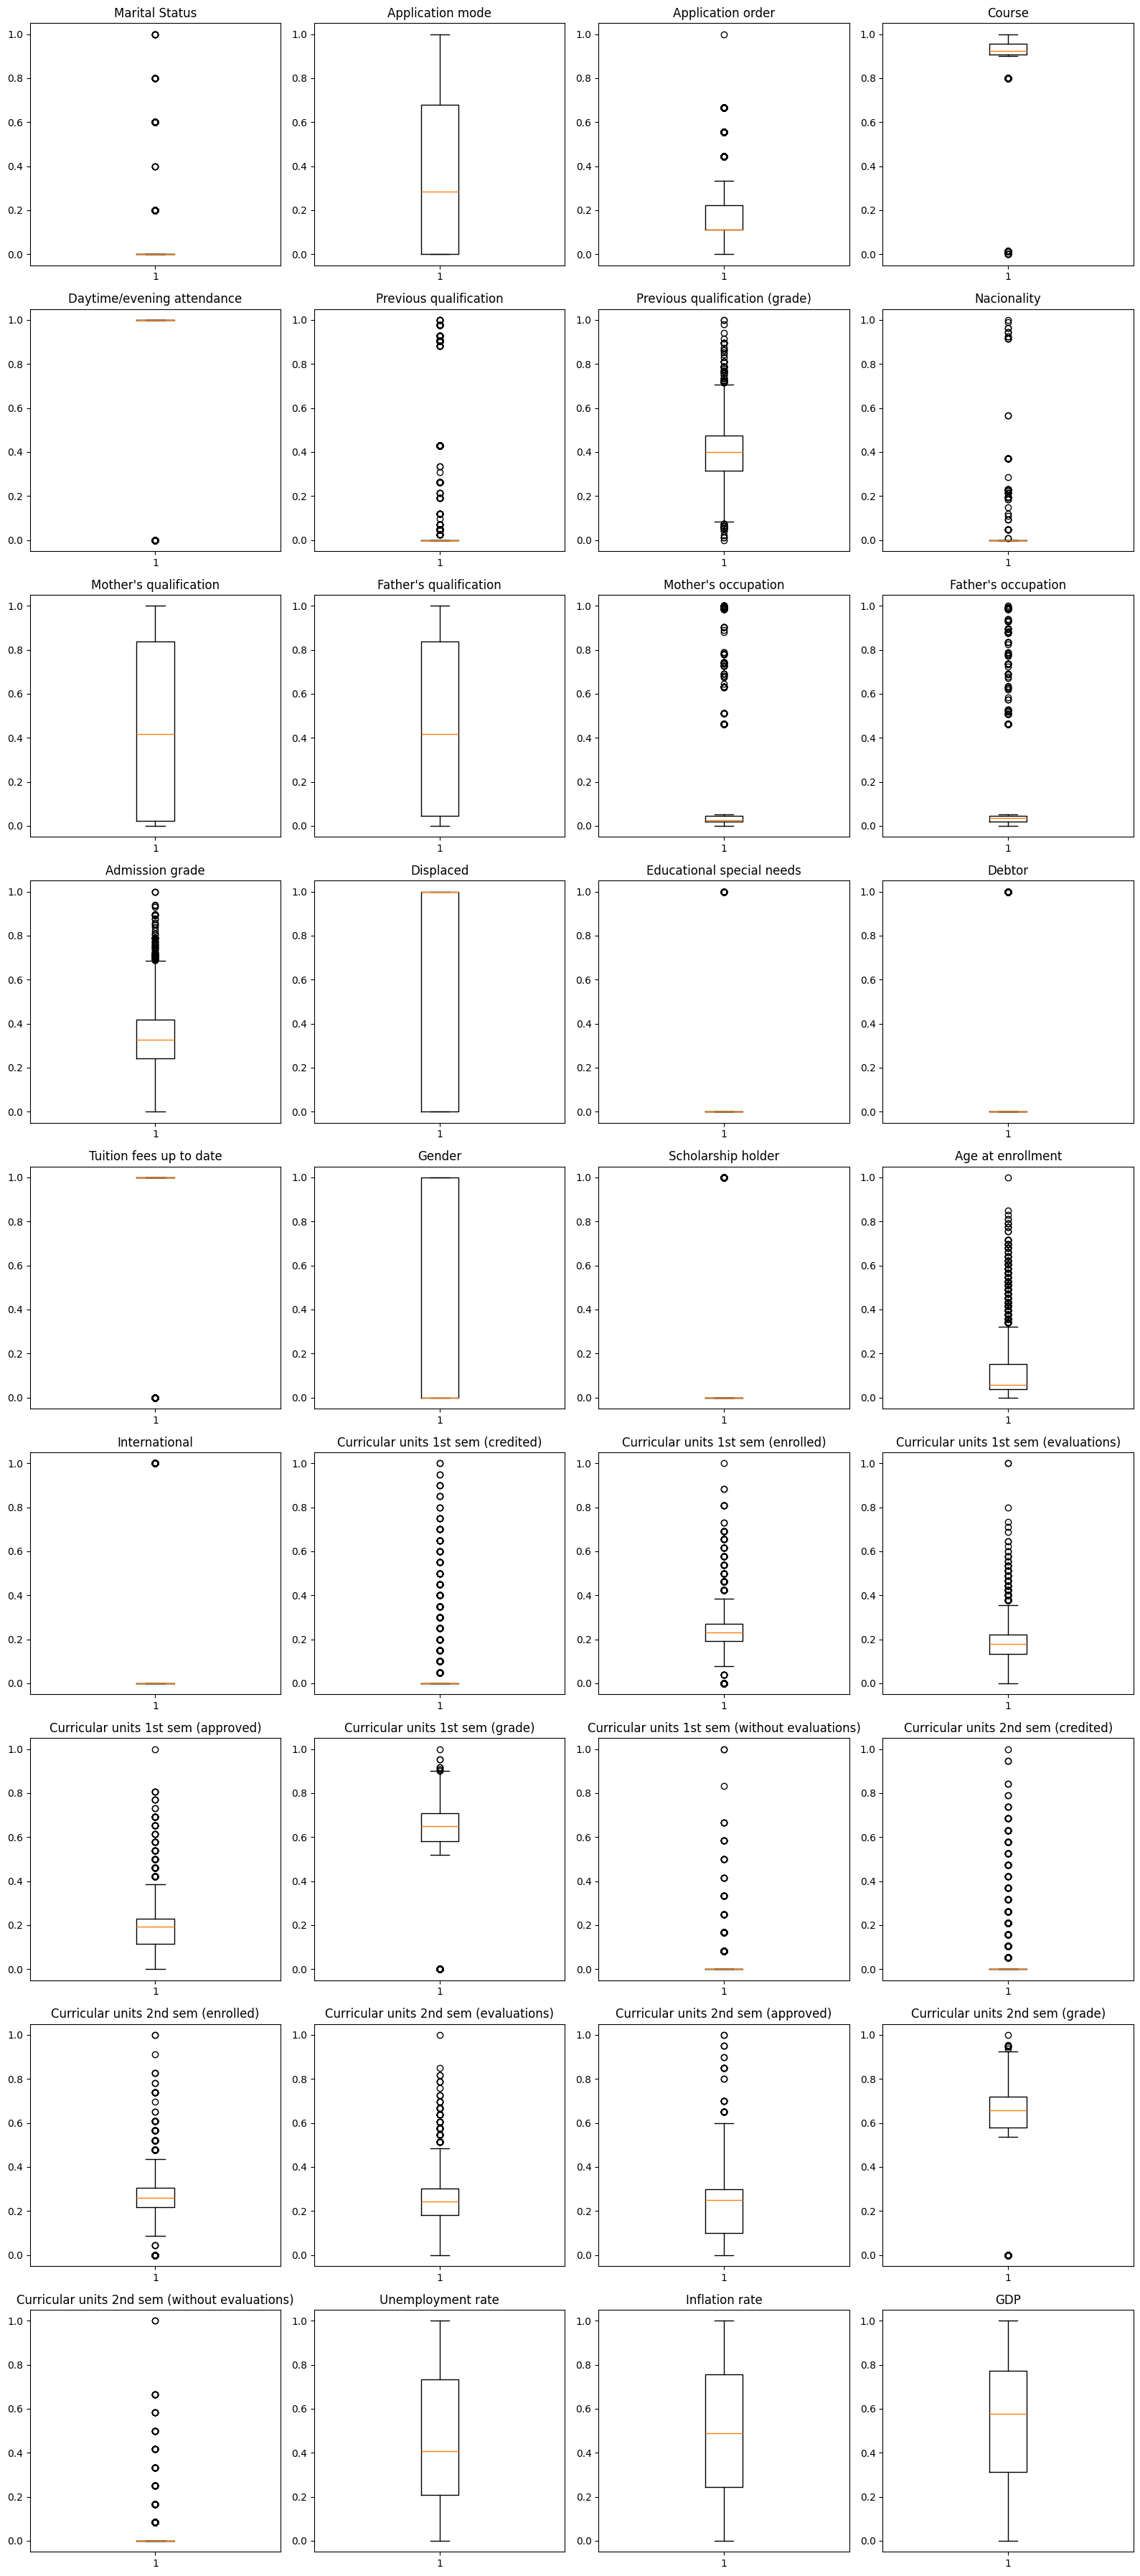

In [96]:
import matplotlib.pyplot as plt

# Define número de colunas por linha
n_cols = 4
n_rows = (len(X.columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols*4, n_rows*4))

for idx, col in enumerate(X.columns):
    plt.subplot(n_rows, n_cols, idx+1)
    plt.boxplot(X[col], vert=True)
    plt.title(col)
    plt.tight_layout()

plt.show()